----------
<h2>
 <br/> Contents <br/>
 <br/>  1 Introduction <br/>
  <br/> 2 Preparing data <br/>
    <br/> 2.1 Creating new variables <br/>
    <br/> 2.2 Summarizing <br/>
  <br/> 3 Visualizing <br/>
    <br/> 3.1 Pricing <br/>
    <br/> 3.2 Bedrooms <br/>
    <br/> 3.3 Bathrooms <br/>
    <br/> 3.4 Features counts <br/>
    <br/> 3.5 Listing times <br/>
  <br/> 4 Mapping <br/>
    <br/> 4.1 Location map <br/>
    <br/> 4.2 Heatmap <br/>
    <br/> 4.3 Cluster analysis  <br/>
</h2>

----------


# 1 Introduction

In this competition we are predicting the interest level of new rental listings on renthop.com. The dataset that has been provided lends itself to different types of analysis: numerical, spatial, text, and image. The following is my initial exploration of the numerical and location fields of the data, it also serves to familiarize myself with Kaggle's Notebooks in the process. The first part will be preparing the data and creating a few new columns, then visualizing to look for relationships, and mapping the location information. 

Thanks to Dan J for the script that loads the data into R. Also, if you liked this notebook please upvote, thanks =D

# 2 Preparing data

In [1]:
# Load packages and data
packages <- c("jsonlite", "dplyr", "purrr", "ggplot2", "scales", "ggthemes", "lubridate")
purrr::walk(packages, library, character.only = TRUE, warn.conflicts = FALSE)

data <- fromJSON("./input/train.json")

# unlist every variable except `photos` and `features` and convert to tibble
vars <- setdiff(names(data), c("photos", "features"))
data <- map_at(data, vars, unlist) %>% tibble::as_tibble(.)



In [58]:
options(repr.plot.width = 4, repr.plot.height = 4)
data[1,]

bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
1,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"Dining Room , Pre-War , Laundry in Building, Dishwasher , Hardwood Floors , Dogs Allowed , Cats Allowed",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg",2400,145 Borinquen Place,medium


In [69]:
#extracting mainly the numeric variables, the list_id might be useful later if I have to join with another dataframe
rentals <- select(data, c(listing_id, bedrooms, bathrooms, created, price, street_address, interest_level, longitude, latitude))
head(rentals, 5)

listing_id,bedrooms,bathrooms,created,price,street_address,interest_level,longitude,latitude
7170325,1,1.0,2016-06-16 05:55:27,2400,145 Borinquen Place,medium,-73.9539,40.7108
7092344,2,1.0,2016-06-01 05:44:33,3800,230 East 44th,low,-73.9722,40.7513
7158677,2,1.0,2016-06-14 15:19:59,3495,405 East 56th Street,medium,-73.9625,40.7575
7211212,3,1.5,2016-06-24 07:54:24,3000,792 Metropolitan Avenue,medium,-73.9425,40.7145
7225292,0,1.0,2016-06-28 03:50:23,2795,340 East 34th Street,low,-73.9743,40.7439


## 2.1 Creating new variables

In [70]:
#creating a new column that counts how many photos each listing has
photos_count <- map(data[['photos']], function(x) length(unlist(x)))
photos_count <- do.call('rbind', photos_count)
rentals$photos_count <- photos_count[,1]

#doing the same with features
features_count <- map(data[['features']], function(x) length(unlist(x)))
features_count <- do.call('rbind', features_count)
rentals$features_count <- features_count[,1]
    
#interest_level is a categorical variable so it makes sense for it to be a factor    
rentals['interest_level_factor'] <- factor(rentals[['interest_level']], levels = c("low", "medium", "high"))

#having a total room count might come in handy
rentals <- mutate(rentals, total_rooms = bedrooms + bathrooms)
    
#formatting dates
rentals$created_dates <- ymd_hms(rentals$created)

    
    

Features and photos should be desirable qualities in a listing. Brokers would not list features unless they thought they were positives, so more features should be better and might lead to higher interest.
Similarly, if the listing looks good it should attract more attention, and a higher number photos might indicate this. 

## 2.2 Summarizing the Data

In [79]:
cat("Rows with NA values:", sum(rowSums(is.na(rentals)) > 0))

summary(rentals)

Rows with NA values: 0

   listing_id         bedrooms       bathrooms        created         
 Min.   :6811957   Min.   :0.000   Min.   : 0.000   Length:49352      
 1st Qu.:6915888   1st Qu.:1.000   1st Qu.: 1.000   Class :character  
 Median :7021070   Median :1.000   Median : 1.000   Mode  :character  
 Mean   :7024055   Mean   :1.542   Mean   : 1.212                     
 3rd Qu.:7128733   3rd Qu.:2.000   3rd Qu.: 1.000                     
 Max.   :7753784   Max.   :8.000   Max.   :10.000                     
     price         street_address     interest_level       longitude      
 Min.   :     43   Length:49352       Length:49352       Min.   :-118.27  
 1st Qu.:   2500   Class :character   Class :character   1st Qu.: -73.99  
 Median :   3150   Mode  :character   Mode  :character   Median : -73.98  
 Mean   :   3830                                         Mean   : -73.96  
 3rd Qu.:   4100                                         3rd Qu.: -73.95  
 Max.   :4490000                                     

Not having NA values is pretty suprising, this data is already cleaned. Looking at the summary, NY has really high real estate and rental prices, and not a lot of space. It makes sense that the median of listings is 1 bed/1 bath, with a median price of $3,150 a month. Note that a few places with a lot of rooms and very high rents skew the distributions, so the mean price is higher than the median. It looks like there are probably a number of outliers. 

In [6]:
group_by(rentals, interest_level_factor) %>%
    summarize(
              count = n(),
              average_price = mean(price), 
              sigma_price = sd(price), 
              #q.25 = quantile(price, .25), 
              median_price = quantile(price, .5), 
              #q.75 = quantile(price, .75), 
              q.99 = quantile(price, .99),
              #q.99.5 = quantile(price, .995),
              median_bedrooms = quantile(bedrooms, .5),
              median_total_rooms = quantile(total_rooms, .5),
              q.99_total_rooms = quantile(total_rooms, .99),
              median_photo_count = quantile(photos_count, .5),
              median_features = quantile(features_count, .5)
             )

interest_level_factor,count,average_price,sigma_price,median_price,q.99,median_bedrooms,median_total_rooms,q.99_total_rooms,median_photo_count,median_features
low,34284,4176.599,26449.322,3300,14500,1,2,7,5,4
medium,11229,3158.767,1243.694,2895,7000,2,3,6,5,5
high,3839,2700.293,2080.555,2400,6200,2,3,6,5,4


The qs in the table above refer to quantiles, so q.25 is the 25th percentile for each subset of interest level. It's interesting to note that 99 percent of the properties have less than 4 rooms, including the bathroom. The median value for total rooms, and median photo counts are close. Which might mean that they are not good variables for predictors. I was hoping price would be a significant factor and the summary does make it seem like the distributions between interest levels have different prices. First, I will take a look at the outliers of this distribution. The plots on price will be difficult to use without doing so. There are a number of approaches to this, however I am going to use the traditional outlier formula from making boxplots. 

In [7]:
options(warn = -1)
#creates an outlier function for me to use
detect_outlier <- function(column) {
  iqr = quantile(column, .75) - quantile(column, .25)
  low = quantile(column, .25) - 1.5 * iqr
  high = quantile(column, .75) + 1.5 * iqr
  outlier_index = ifelse(column < low | column > high, TRUE, FALSE)
  results <- list("index" = outlier_index, "values"  = column[outlier_index], 'low' = low, 'high' = high, 'iqr' = iqr)
  return(results)
}

#uses function and creates new dataframe of rentals
outliers <- detect_outlier(rentals[['price']])
cleaned_rentals <- rentals[!outliers$index, ]

# 3 Visualizing 

## 3.1 Price

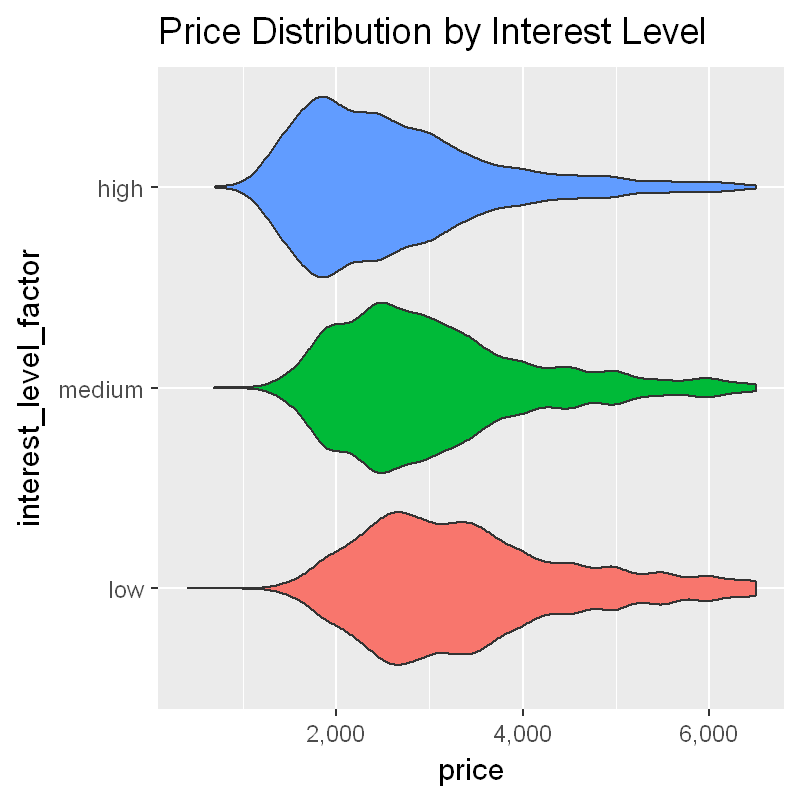

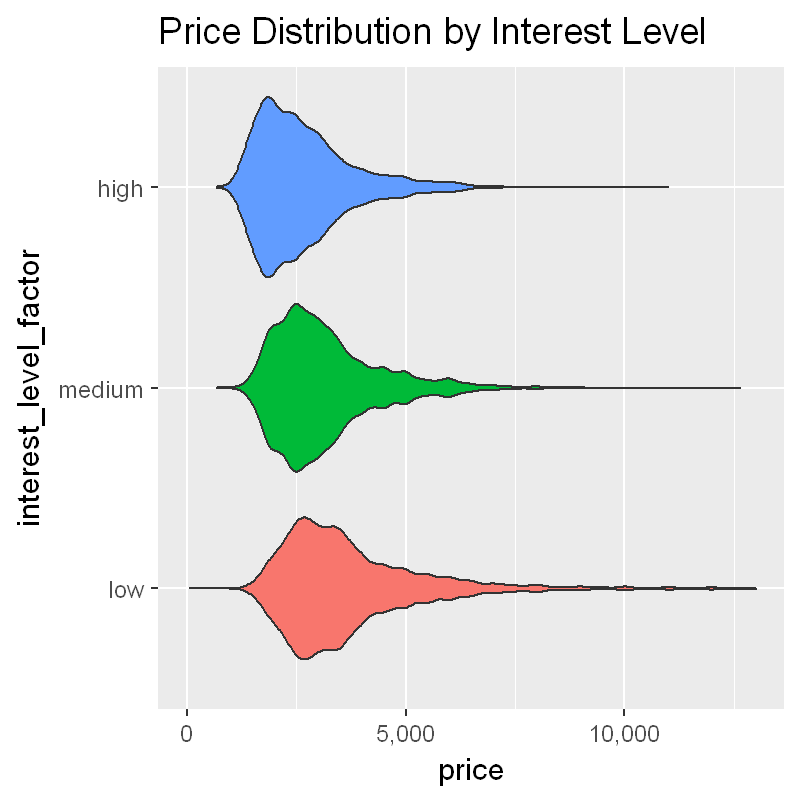

In [59]:
#plot of the price distributions with outliers removed
ggplot(cleaned_rentals, aes(x = interest_level_factor, y = price)) +
    geom_violin(aes(fill = interest_level_factor)) +
    scale_y_continuous(label = comma) +
    guides(fill = FALSE) +
    coord_flip() +
    ggtitle("Price Distribution by Interest Level")
   
   

q = quantile(rentals$price, .99)
#plot of the price dist without outliers removed
ggplot(rentals, aes(x = interest_level_factor, y = price)) +
    geom_violin(aes(fill = interest_level_factor)) + 
    scale_y_continuous(label = comma, limits =c(0, q)) +
    guides(fill = FALSE) +
    coord_flip() +
    ggtitle("Price Distribution by Interest Level")


The first chart above is with the outliers removed data set, the second one only took out the highest one percent of prices. It looks like the distributions are very skewed, and leaving out outliers might be cutting too much of the distribution out.  It's easier to see the contrast in the distributions with the outliers removed though. The high interest group is considerably fuller at lower prices. 

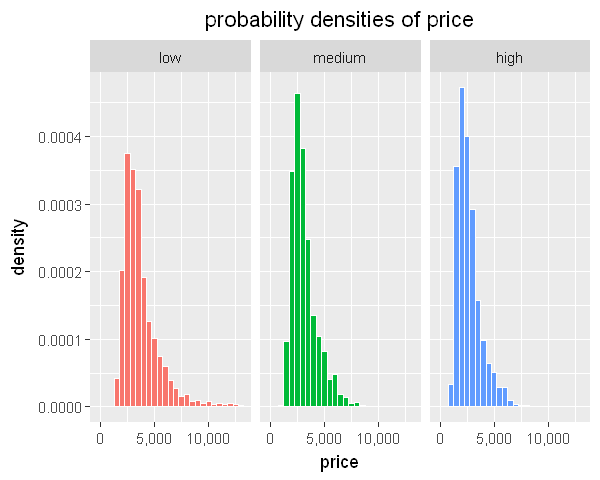

In [9]:
#using 99th percentile
cut_off <- rentals$price %>% quantile(., .99)
#rentals[rentals$price <= cut_off,] %>% dim()

#Price density plot
ggplot(data = rentals[rentals$price <= cut_off,], aes(x = price, fill = interest_level_factor)) +
    geom_histogram(aes(y = ..density..), binwidth= 500, position = "identity", color = "white", size = .05) +
    facet_grid(.~interest_level_factor) +
    ggtitle("probability densities of price") +
    scale_y_continuous(label = comma) +
    scale_x_continuous(label = comma) +
    theme(plot.title = element_text(hjust = 0.5)) +
    guides(fill = FALSE) + 
    #xlim(0, 15000)
    list()
        

Confirming the violin plot, it looks like the high interest listings are much more concentrated between between 0 and 5,000 .

## 3.2 Bedrooms

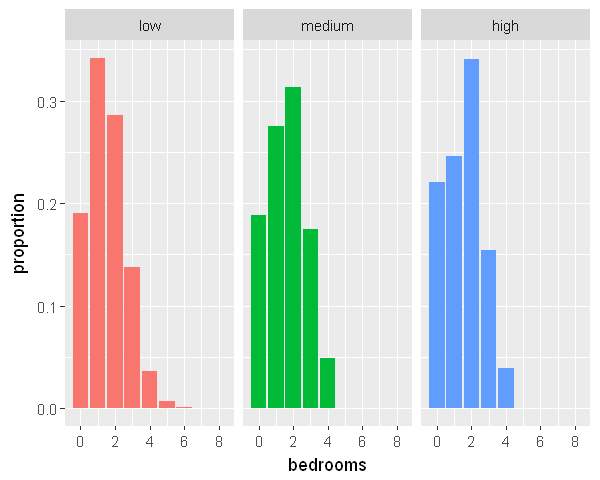

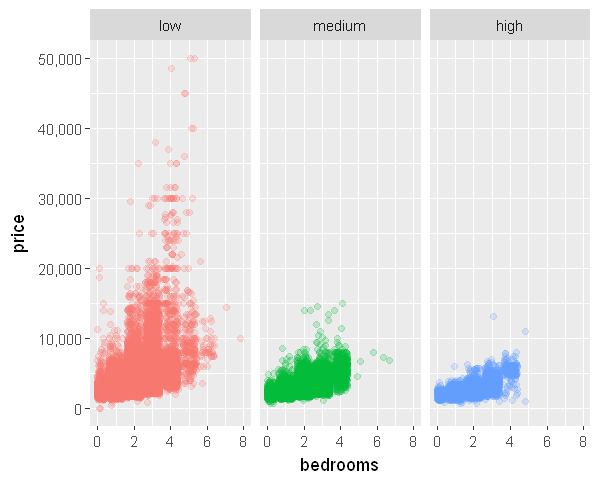

In [10]:

#summarizing table for bar chart  
room_counts <- group_by(rentals, interest_level_factor, bedrooms) %>%
  summarize(room_count = n()) %>% 
  ungroup() %>% 
  group_by(interest_level_factor) %>% 
  mutate(total_bedrooms = sum(room_count)) %>%
  mutate(probability = room_count/total_bedrooms)

#price by bedrooms barchart  
ggplot(room_counts, aes(bedrooms, proability)) +
geom_bar(aes(fill = interest_level_factor), stat = "identity")  +
facet_grid(.~interest_level_factor) +
#ylab("proportion") +
guides(fill = FALSE) + 
list()

#checking the probs sum up to 1
#room_counts %>% summarize(check_p = sum(p))


#price by number of bedrooms, used rentals not cleaned_rentals!  
ggplot(rentals, aes(x = bedrooms, y = price)) +
  geom_jitter(aes(color = interest_level_factor), alpha = .2) +
  facet_grid(.~interest_level_factor) +
  xlim(0, 8) +
  scale_y_continuous(label = comma, limits = c(0, 50000)) +
  guides(color = FALSE) +
  list()

One thing that stands out in looking at data this way is that interest really drops off around the 8-10 thousand level, and 2 bedrooms seems to be a desirable trait. 

## 3.3 Bathrooms

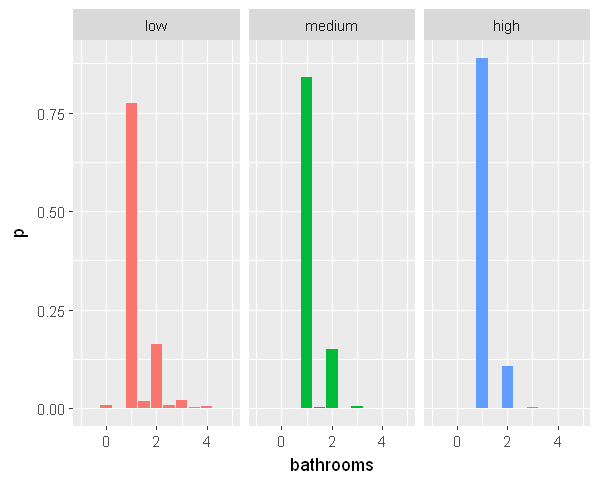

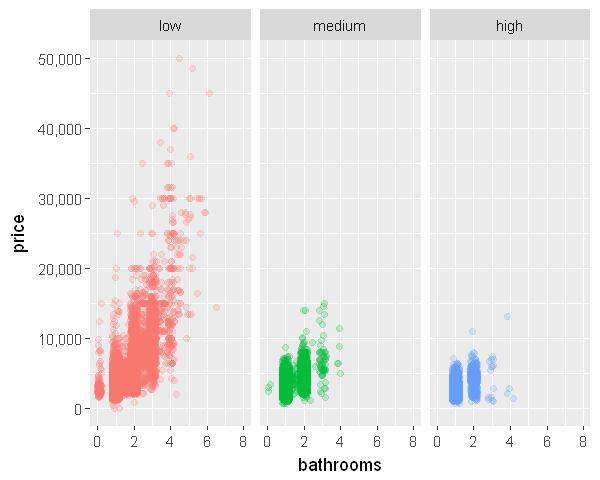

In [11]:

#creating proportion
counts_by_variable <- group_by(rentals, interest_level_factor, bathrooms) %>% 
  summarize(counts = n())
counts_by_group <- group_by(rentals, interest_level_factor) %>% 
  summarize(totals = n()) 
proportions <- left_join(counts_by_variable, counts_by_group, by = "interest_level_factor") %>% 
  mutate(p = counts/totals)

#bathrooms barchart
ggplot(proportions, aes(x = bathrooms, y = p)) +
  geom_bar(aes(fill = interest_level_factor), stat = "identity") +
  facet_grid(~interest_level_factor) +
  scale_x_continuous(limits = c(-1, 5)) +
  guides(fill = FALSE) +   
  list()

#price by number of bedrooms, used rentals not cleaned_rentals!  
ggplot(rentals, aes(x = bathrooms, y = price)) +
  geom_jitter(aes(color = interest_level_factor), alpha = .2) +
  facet_grid(.~interest_level_factor) +
  xlim(0, 8) +
  scale_y_continuous(label = comma, limits = c(0, 50000)) +
  guides(color = FALSE) +
  list()

## 3.4 Features Counts

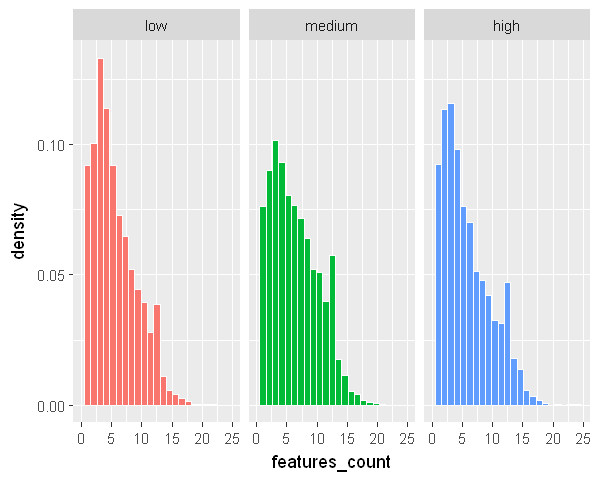

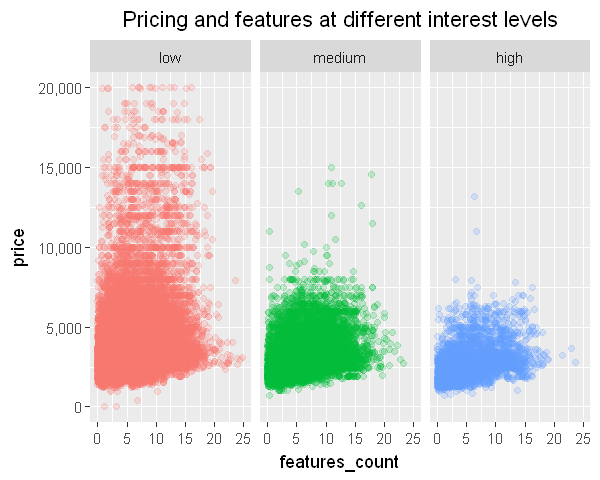

In [12]:
#features by interest  
ggplot(cleaned_rentals, aes(x = features_count)) +
  geom_histogram(aes(y = ..density.., fill = interest_level_factor), 
                 bins = 25, position = "identity", color = "white", size = 0.05) +
  facet_grid(.~interest_level_factor) +
  xlim(0, 25) +
  guides(fill = FALSE) +
  list()


#price by number of features, used rentals not cleaned_rentals!  
ggplot(rentals, aes(x = features_count, y = price)) +
  geom_jitter(aes(color = interest_level_factor), alpha = .2) +
  facet_grid(.~interest_level_factor) +
  xlim(0, 25) +
  ggtitle("Pricing and features at different interest levels") +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(label = comma, limits = c(0, 20000)) +
  guides(color = FALSE)

There are a noticeable number of highly priced listings without many features listed.

## 3.5 Listing Dates

list()

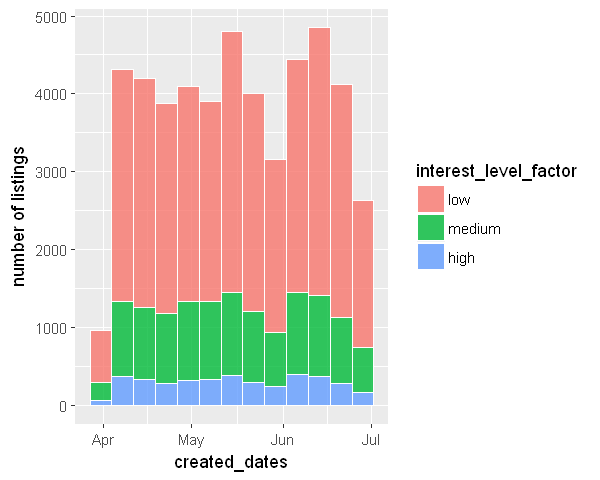

In [32]:

second_diff <- rentals$created_dates[1] - rentals$created_dates
days_in_between <- as.numeric(second_diff) / (3600 * 24)
rentals$days_in_between <- days_in_between


ggplot(rentals, aes(x = created_dates)) +
  geom_histogram(aes(fill = interest_level_factor), 
                   alpha = 0.8, color = "white", bins = 13, size = 0.5) +
  #geom_density(aes(color = interest_level_factor)) +
  guides(color = FALSE) + 
  ylab("number of listings")
  #facet_grid(~interest_level_factor) +
  list()


Our snapshot was from late Spring to early mid-Summer, probably a busy time for renthop since people tend to do their apartment searching during this time.

## 4 Mapping

In [14]:
sample_index <- sample(1:nrow(rentals), 100)
rentals_sample <- rentals[sample_index, ]
head(rentals_sample)

listing_id,bedrooms,bathrooms,created,price,street_address,interest_level,longitude,latitude,photos_count,features_count,interest_level_factor,total_rooms,beds_to_baths,created_dates,days_in_between
7040353,1,1,2016-05-20 01:22:50,1625,4455 Broadway,low,-73.9326,40.8572,6,3,low,2,1,2016-05-20 01:22:50,27.189317
7210689,1,1,2016-06-24 07:24:56,3450,307 Mott St.,low,-73.9942,40.7252,5,7,low,2,1,2016-06-24 07:24:56,-8.062141
6822756,0,1,2016-04-05 01:20:38,2100,41-18 Crescent Street,medium,-73.9398,40.7518,6,5,medium,1,0,2016-04-05 01:20:38,72.190845
7099067,0,1,2016-06-02 06:11:41,2099,341 West 45th Street,medium,-73.9900,40.7601,4,9,medium,1,0,2016-06-02 06:11:41,13.988727
7000710,2,1,2016-05-12 03:23:03,3300,301 E 49 St.,medium,-73.9685,40.7543,5,7,medium,3,2,2016-05-12 03:23:03,35.105833
7053037,2,0,2016-05-22 03:47:54,2950,304 East 92nd Street,low,-73.9486,40.7813,0,1,low,2,Inf,2016-05-22 03:47:54,25.088576


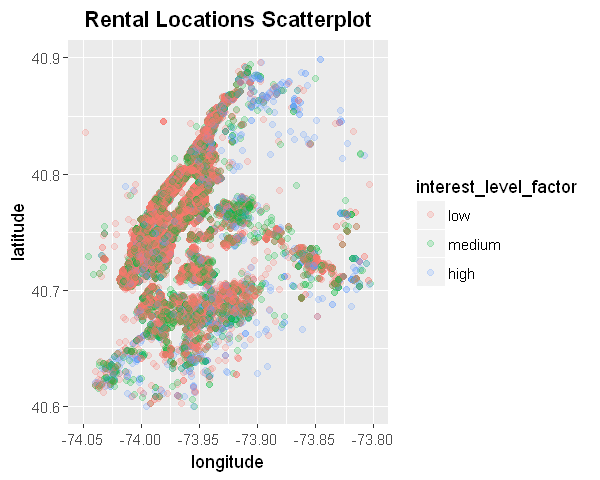

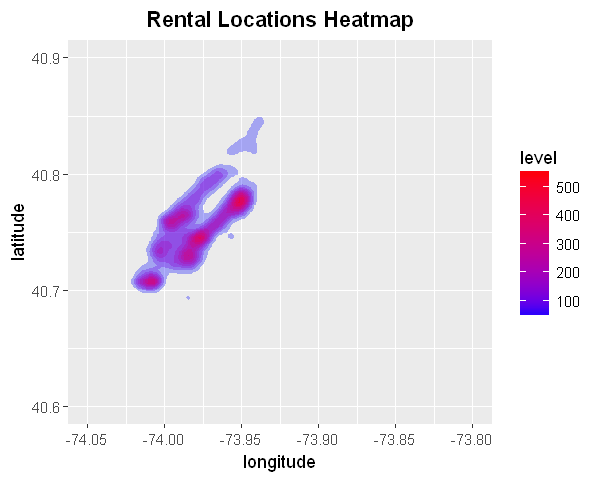

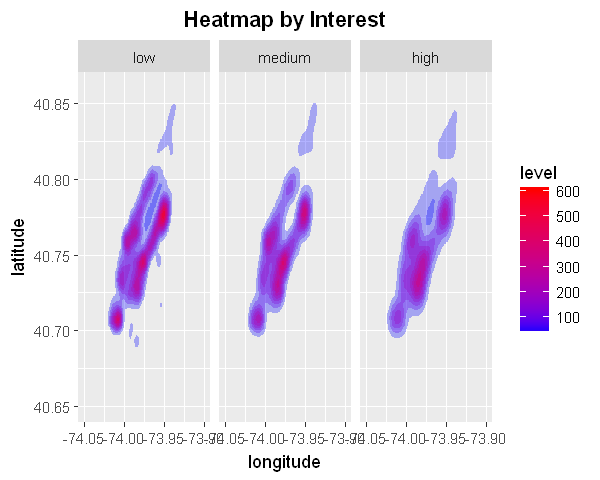

In [15]:
#scatter plot
ggplot(data = rentals) +
  geom_point(aes(x = longitude, y = latitude, color = interest_level_factor), alpha = 0.2) +
  #stat_density2d(data = rentals, aes(x = longitude, y = latitude), geom = 'polygon') + 
  #facet_grid(~interest_level_factor) +
  ggtitle("Rental Locations Scatterplot") +
  guides(alpha = FALSE) +
  theme(plot.title = element_text(hjust = 0.5, face = 'bold')) +
  #scale_fill_gradient(low = 'gray', high = 'red') +
  xlim(-74.05, -73.8) +
  ylim(40.6, 40.9)

#density plot
ggplot(data = rentals) +
  #geom_point(aes(x = longitude, y = latitude, color = interest_level_factor), alpha = 0.2) +
  stat_density2d(data = rentals, aes(x = longitude, y = latitude,  fill=..level..), geom = 'polygon', alpha = 0.3) + 
  #facet_grid(~interest_level_factor) +
  ggtitle("Rental Locations Heatmap") +
  guides(alpha = FALSE) +
  theme(plot.title = element_text(hjust = 0.5, face = 'bold')) +
  scale_fill_gradient(low = 'blue', high = 'red') +
  xlim(-74.05, -73.8) +
  ylim(40.6, 40.9)

#faceted density plot
ggplot() +
  #geom_point(aes(x = longitude, y = latitude, color = interest_level_factor), alpha = 0.2) +
  stat_density2d(data = rentals, aes(x = longitude, y = latitude, fill = ..level..), geom = 'polygon', alpha = 0.3) + 
  facet_grid(~interest_level_factor) +
  ggtitle("Heatmap by Interest") +
  guides(alpha = FALSE) +
  theme(plot.title = element_text(hjust = 0.5, face = 'bold')) +
  scale_fill_gradient(low = 'blue', high = 'red') +
  xlim(-74.05, -73.9) +
  ylim(40.65, 40.86) + 
  list()

API calls don't seem to work from here so I decided to leave out the underlying maps. The overlaying scatter plot still gives the shape of Manhattan though, and it looks like Manhattan and Brooklyn have a the highest concentration of listings. It is hard to tell where the listing density is higher though. The next graph is easier to see this information, the density mapping is concentrated into the shape of Manhattan, while Brooklyn is noticeably less dense. Then looking at the interest levels seperately, high interest listings on the east side were significantly more dense than the west. Midtown East to East Village areas are where the high interest listings are located. This looks well-suited for clustering. 

# 4.1 Cluster Analysis

[1] 95.97557

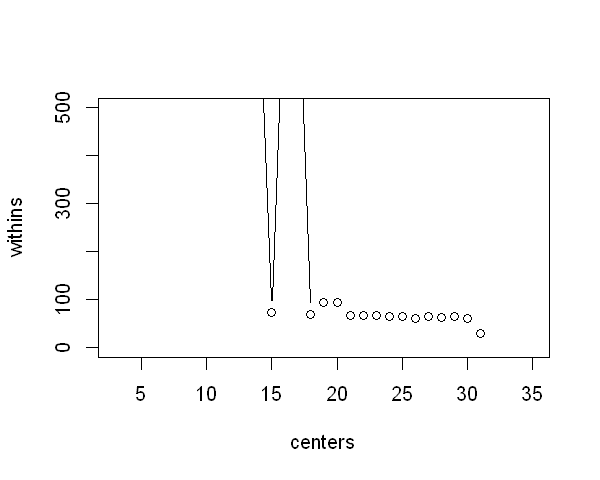

In [16]:

location_data <- select(rentals, longitude, latitude)

#kmeans finding the number of clusters to use
set.seed(42)
withins <- seq(0, 30)
for (i in 1:30) {
  withins[i] = kmeans(location_data, centers = i, nstart = 5)$tot.withinss
}

plot(x = 1:(length(withins)), y = withins, type = "b", xlim = c(3, 35), xlab= "centers", ylim = c(0, 500))

kmeans_model <- kmeans(location_data, centers = 18, nstart = 5)

#kmeans_model$tot.withinss  
rentals$cluster <- kmeans_model$cluster


  

In [17]:
Using kmeans I am trying to find the optimal number of clusters to use by finding when the within sum of squares becomes stable. 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Using kmeans
          ^


In [ ]:
prob_chart <- group_by(rentals, interest_level_factor, cluster) %>% 
  summarize(count = n()) %>% 
  mutate(total = sum(count), p = count/total)

ggplot(prob_chart, aes(x = cluster, y = p)) + 
  geom_bar(aes(fill = interest_level_factor), position = "fill", stat = "identity") +
  #facet_grid(~interest_level_factor)
  list()

The relative proprtions of each interest level are different in most of the clusters, which might make the cluster number a good variable to use for an input. 